Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 

Find and deal with outliers, anomalies, and missing data within the dataset.
Plot appropriate univariate and bivariate summaries recording our observations.
Implement the solution by performing hypothesis testing.
This will need to be documented when writing the report. 

Importing Libraries 

In [2]:
#importing 
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


load dataset

In [0]:
#loading the dataset
df = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')


Data description

In [31]:
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75015,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75015,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75015,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75015,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75015,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [4]:
#size
print('This dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')

This dataset has 16085 rows, and 13 columns


In [0]:
#numeric description
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [0]:
df.describe(include='all')

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085,16085.000000,16085.000000,16085,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
unique,NaN,156,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,5/26/2018,NaN,NaN,weekday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,104,NaN,NaN,11544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,88791.293876,NaN,1431.330619,2.969599,NaN,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,NaN,33.212050,2.008378,NaN,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,NaN,1174.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,NaN,1439.000000,1.000000,NaN,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,NaN,1440.000000,3.000000,NaN,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,NaN,1440.000000,5.000000,NaN,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000


In [0]:
print(df.nunique())

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64


In [0]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(5)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [16]:
df.set_index('postal_code')

,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,,,,,,,,,,,,
75015,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
75015,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
75015,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
75015,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
75015,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...
75015,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
75015,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
75015,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0


 **summary**

 This dataset has 16085 rows, and 11 columns numerical and 2 categorical columns.


Univariate analysis

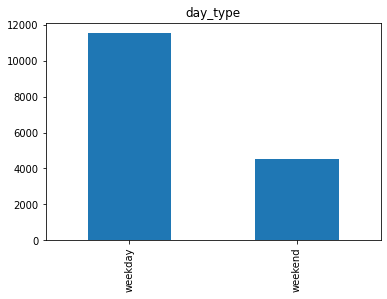

In [0]:
df['day_type'].value_counts().plot.bar(title='day_type')
#both electric and blue cars are used more during weekdays than weekends

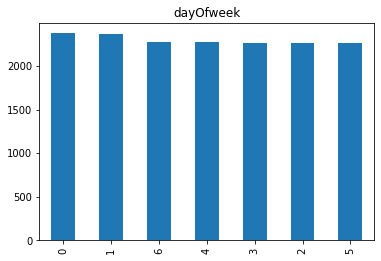

In [0]:
df['dayOfWeek'].value_counts().plot.bar(title='dayOfweek')
#in Monday and Tuesday the electric cars are used more than the other days of the week 

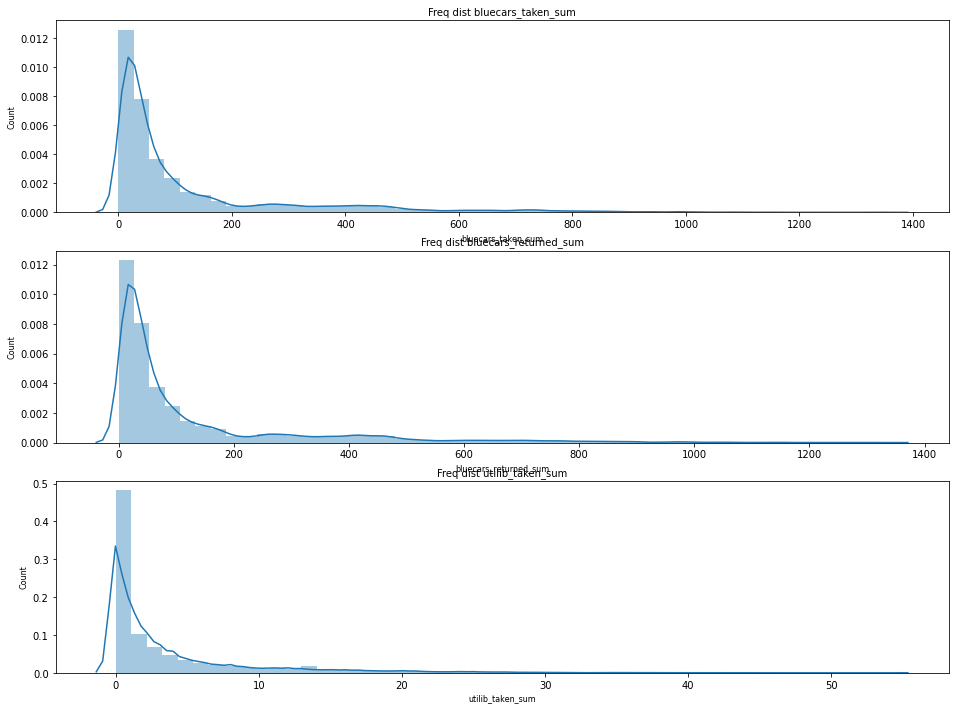

In [50]:
col_names = ['bluecars_taken_sum','bluecars_returned_sum','utilib_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

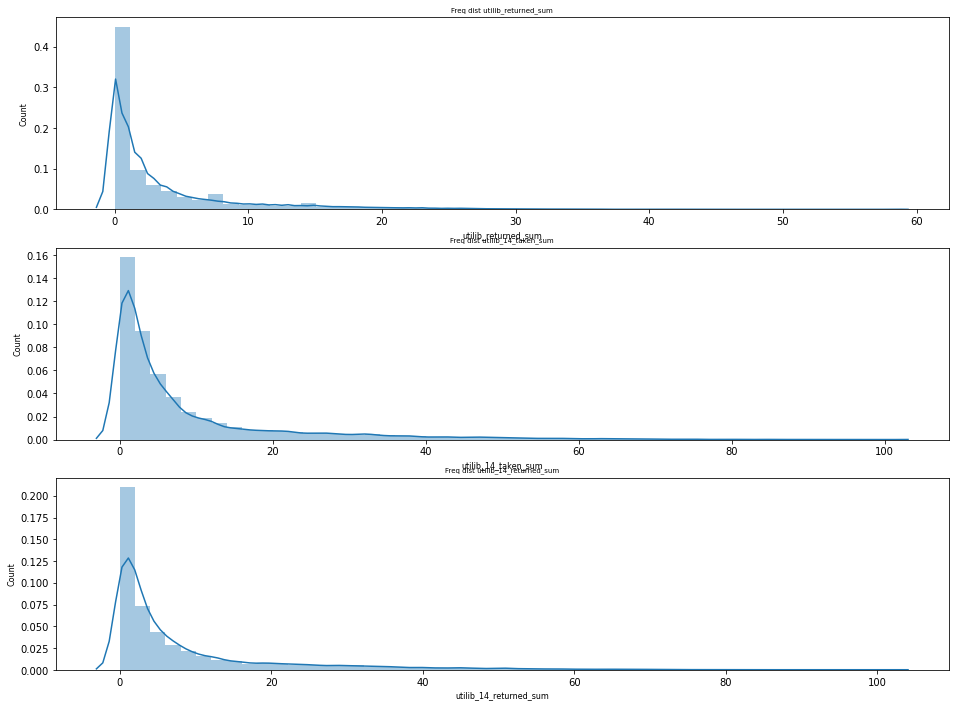

In [52]:
col_names=['utilib_returned_sum','utilib_14_taken_sum','utilib_14_returned_sum']
fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=7)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

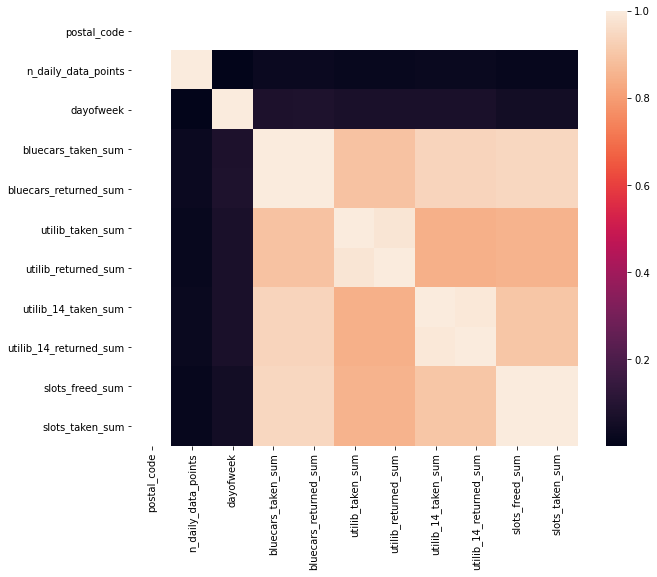

In [70]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

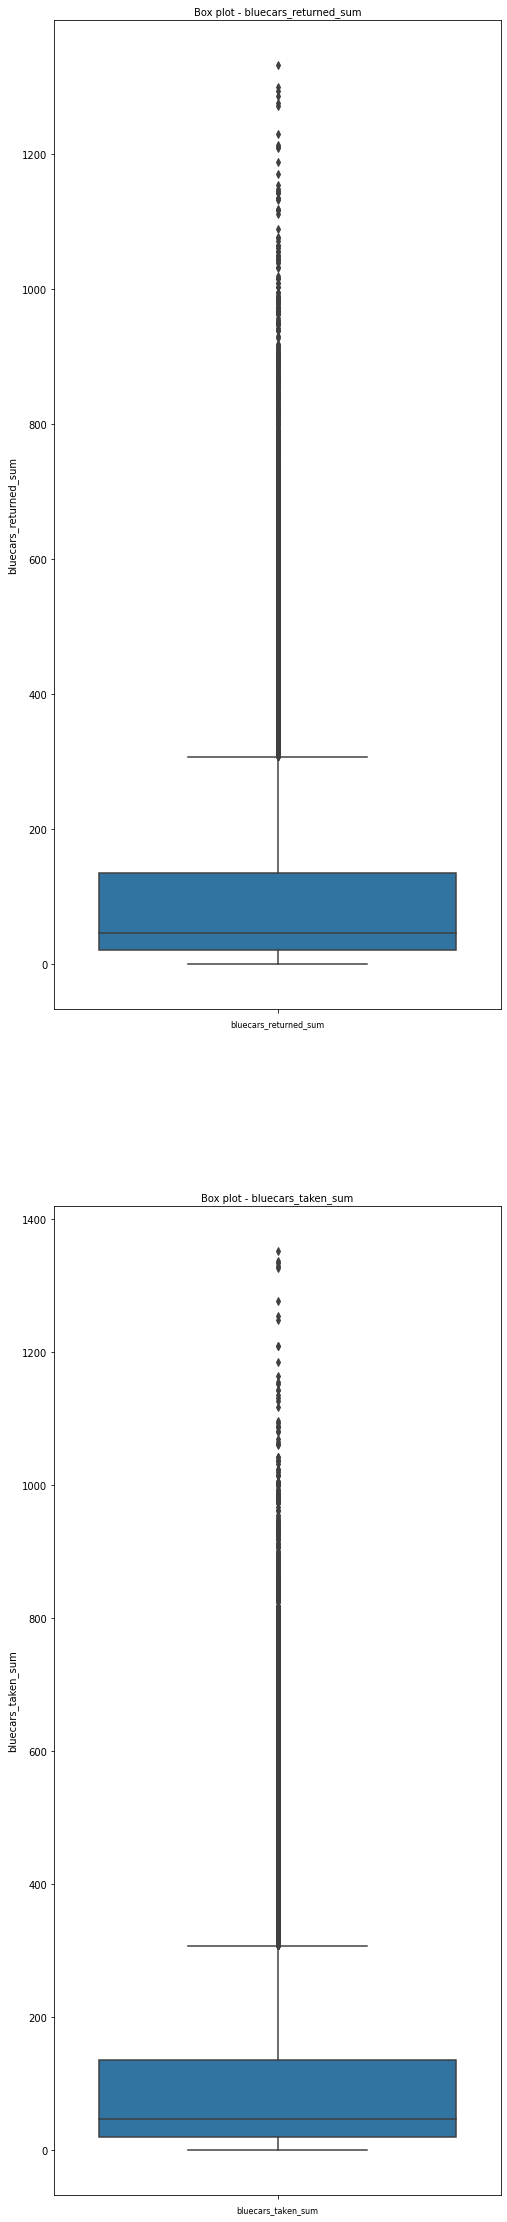

In [22]:

col_names = ['bluecars_returned_sum','bluecars_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Bivariate analysis

In [5]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

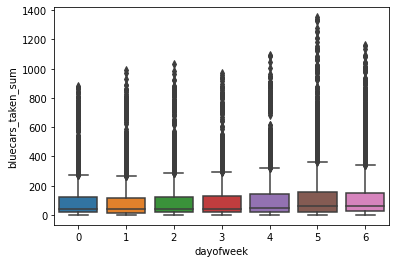

In [8]:
sns.boxplot(x= df['dayofweek'], y= df['bluecars_taken_sum'])

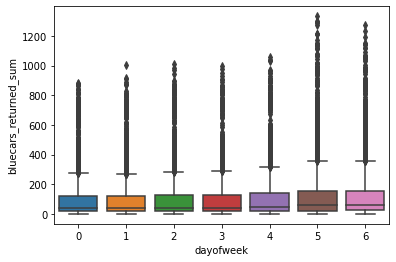

In [21]:
sns.boxplot(x="dayofweek", y="bluecars_returned_sum", data=df)
plt.show()

In [26]:
coeff = df["bluecars_taken_sum"].corr(df["bluecars_returned_sum"]) 
print(coeff)

0.9986597051672199


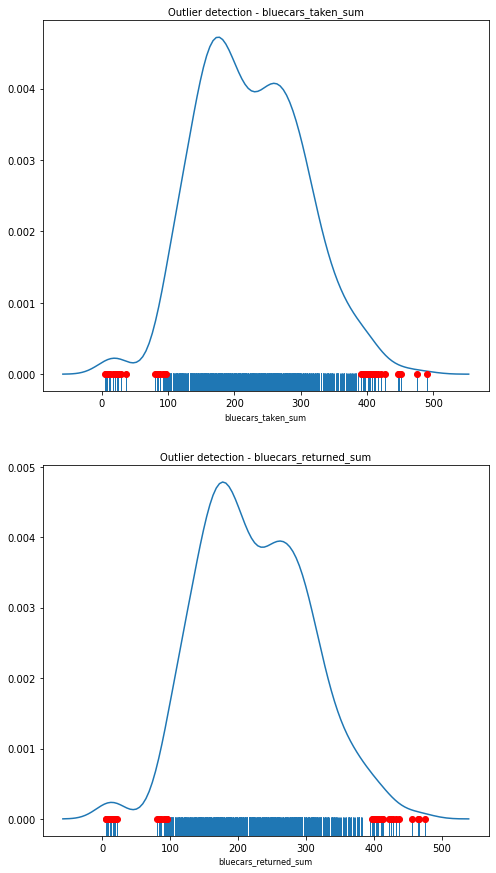

In [23]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2
    minval, maxval = np.percentile(data, [diff, 100 - diff])
    return (data < minval) | (data > maxval)

col_names = ['bluecars_taken_sum','bluecars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,15))

for i, col_val in enumerate(col_names):
    x = df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[percentile_based_outlier(x)]
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

hypothesis

In [0]:
#my null hypothesis is that Bluecars taken are equal during the weekday.
#my alternate hypothesis is that bluecars taken are not the equal
Ho: taken is equal to returned
Ha: taken is not equal to returned
n: is sample size = 500
significance level = (0.05/2)#since it is two tailed


In [36]:
df['bluecars_taken_sum'].mean()

125.92695057506994

In [35]:
df['bluecars_taken_sum'].std()

185.42657876727893

In [51]:
dayofweek = df.sample(n=900)
print(dayofweek)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
2877         75019  3/14/2018  ...              102              104
7132         92270  4/29/2018  ...                0                0
5848         92190  3/24/2018  ...                0                0
14725        94340  2/13/2018  ...                0                0
15947        95880  1/19/2018  ...                0                0
...            ...        ...  ...              ...              ...
11915        93370   5/2/2018  ...                0                0
4054         91330  6/19/2018  ...                0                0
3984         91330  3/30/2018  ...                0                1
7144         92270  5/22/2018  ...                0                0
13029        94000   3/7/2018  ...                0                0

[900 rows x 13 columns]


In [47]:
#sample size is greater than 30 hence use ztest
#mean=125.92695057506994
#assumedmean=127
#std=185.42657876727893
#samplesize=900
#(mean – assumedmean)=0.92695057506994
#Zscore = (assumedmean-mean) / (std / √samplesize)
Zscore = (126-125.92695057506994)/(185.42657876727893/30)
print(Zscore)

0.011818600992753557


In [50]:
#import norm function from the scipy library
from scipy.stats import norm
prob = norm.cdf(Zscore)
print("The p-value:",prob)
if prob < 0.05:
  print("I reject the null hypothesis.")
else:
  print("I neither reject the null hypothesis nor do I accept it.")

The p-value: 0.5047148298702357
I neither reject the null hypothesis nor do I accept it.
